# Data Cleaning
   

In [44]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [45]:
# Import the clean dataset for train and test
train = pd.read_csv("../datasets/train_clean.csv", na_filter=False)
test = pd.read_csv("../datasets/test_clean.csv", na_filter=False)

- Some of the categorical columns are ordinal variables which each can turn into numbers

In [46]:
# Replace ordinal variables with 7 options to numbers
def cat_to_num(x):
    if x == 'GLQ':
        return 6
    if x == 'ALQ':
        return 5
    if x == 'BLQ':
        return 4
    if x == 'Rec':
        return 3
    if x == 'LwQ':
        return 2
    if x == 'Unf':
        return 1
    if x == 'NA':
        return 0
    
ordinal = ['BsmtFin Type 1', 'BsmtFin Type 2']

train.loc[:, ordinal] = train.loc[:,ordinal].applymap(cat_to_num)
test.loc[:, ordinal] = test.loc[:,ordinal].applymap(cat_to_num)

In [47]:
# Replace ordinal variables with 6 options to numbers
def cat_to_num2(x):
    if x == 'Ex':
        return 5
    if x == 'Gd':
        return 4
    if x == 'TA':
        return 3
    if x == 'Fa':
        return 2
    if x == 'Po':
        return 1
    if x == 'NA':
        return 0
    
ordinal2 = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Kitchen Qual',
          'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC']

train.loc[:, ordinal2] = train.loc[:,ordinal2].applymap(cat_to_num2)
test.loc[:, ordinal2] = test.loc[:,ordinal2].applymap(cat_to_num2)

In [48]:
# Replace ordinal variables with 5 options to numbers
def cat_to_num3(x):
    if x == 'Gd' or x == 'GdPrv' :
        return 4
    if x == 'Av' or x == 'MnPrv' :
        return 3
    if x == 'Mn' or x == 'GdWo' :
        return 2
    if x == 'No' or x == 'MnWw' :
        return 1
    if x == 'NA' :
        return 0
    
ordinal3 = ['Fence', 'Bsmt Exposure']

train.loc[:, ordinal3] = train.loc[:,ordinal3].applymap(cat_to_num3)
test.loc[:, ordinal3] = test.loc[:,ordinal3].applymap(cat_to_num3)

In [49]:
# Replace ordinal variables with 4 options to numbers
def cat_to_num4(x):
    if x == 'Reg' or x == 'Fin':
        return 3
    if x == 'IR1' or x == 'RFn':
        return 2
    if x == 'IR2'  or x == 'Unf':
        return 1
    if x == 'IR3' or x == 'NA':
        return 0
    
ordinal4 = ['Lot Shape', 'Garage Finish']

train.loc[:, ordinal4] = train.loc[:,ordinal4].applymap(cat_to_num4)
test.loc[:, ordinal4] = test.loc[:,ordinal4].applymap(cat_to_num4)

In [50]:
# Replace ordinal variables with 3 options to numbers
def cat_to_num5(x):
    if x == 'Pave' or x == 'Gtl' or x == 'Y':
        return 2
    if x == 'Grvl' or x == 'Mod' or x == 'P':
        return 1
    if x == 'NA' or x == 'Sev' or x == 'N':
        return 0
    
ordinal5 = ['Alley', 'Land Slope', 'Paved Drive']

train.loc[:, ordinal5] = train.loc[:,ordinal5].applymap(cat_to_num5)
test.loc[:, ordinal5] = test.loc[:,ordinal5].applymap(cat_to_num5)

In [51]:
# Replace ordinal variables with 2 options to numbers
def cat_to_num6(x):
    if x == 'Pave' or x == 'Y':
        return 1
    if x == 'Grvl' or x == 'N':
        return 0
    
ordinal6 = ['Street', 'Central Air']

train.loc[:, ordinal6] = train.loc[:,ordinal6].applymap(cat_to_num6)
test.loc[:, ordinal6] = test.loc[:,ordinal6].applymap(cat_to_num6)

In [52]:
# drop Id and Pid columns since it represents the unique id of each house
train.drop(columns= ['PID'], axis = 1, inplace=True)
test.drop(columns= ['PID'], axis = 1, inplace=True)

In [53]:
# Subset the dataset with numerical columns
train_num = train.select_dtypes(include=['number'])

# EDA

## Target Variable

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


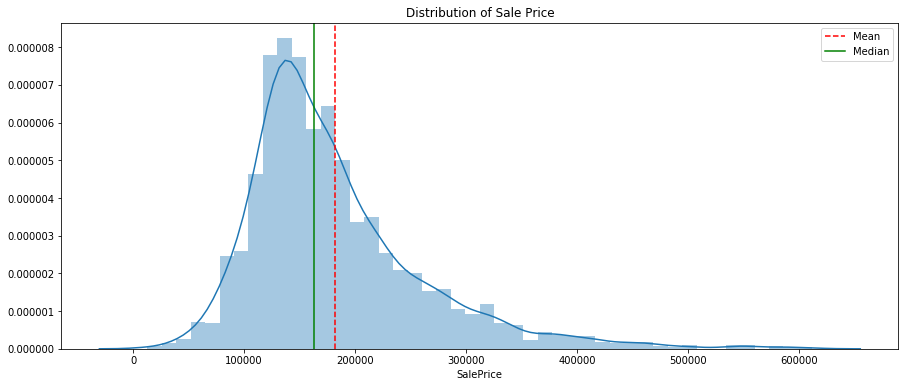

In [12]:
# Plot the distribution of the Sale Price column
plt.figure(figsize = (15,6))
sns.distplot(train['SalePrice'])
plt.axvline(train['SalePrice'].mean(), color='r', linestyle='--')
plt.axvline(train['SalePrice'].median(), color='g', linestyle='-')
plt.legend({'Mean':train['SalePrice'].mean(),'Median':train['SalePrice'].median()})
plt.title("Distribution of Sale Price");

- The plot of sale price shows that distribution is skewed right which the train model can yield in high error. Therefore, we should perform log transformation to make the distribution more normal.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


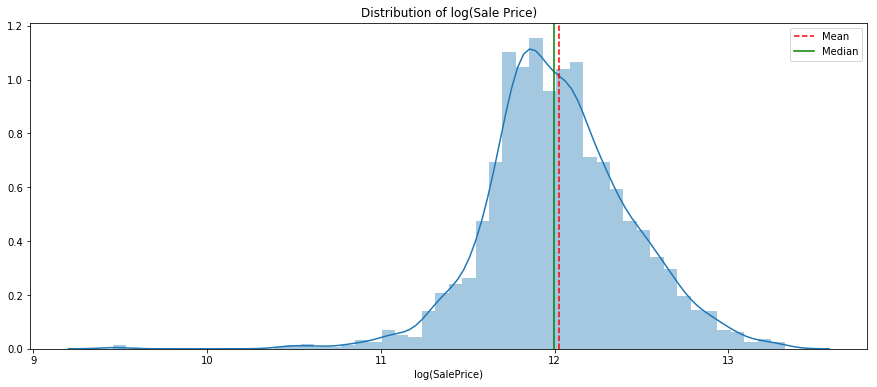

In [13]:
# Plot the distribution of the Sale Price column with log transformation
plt.figure(figsize = (15,6))
sns.distplot(np.log(train['SalePrice']))
plt.axvline(np.log(train['SalePrice']).mean(), color='r', linestyle='--')
plt.axvline(np.log(train['SalePrice']).median(), color='g', linestyle='-')
plt.legend({'Mean':np.log(train['SalePrice']).mean(),'Median':np.log(train['SalePrice']).median()})
plt.title("Distribution of log(Sale Price)")
plt.xlabel("log(SalePrice)");

## Predicting Variables

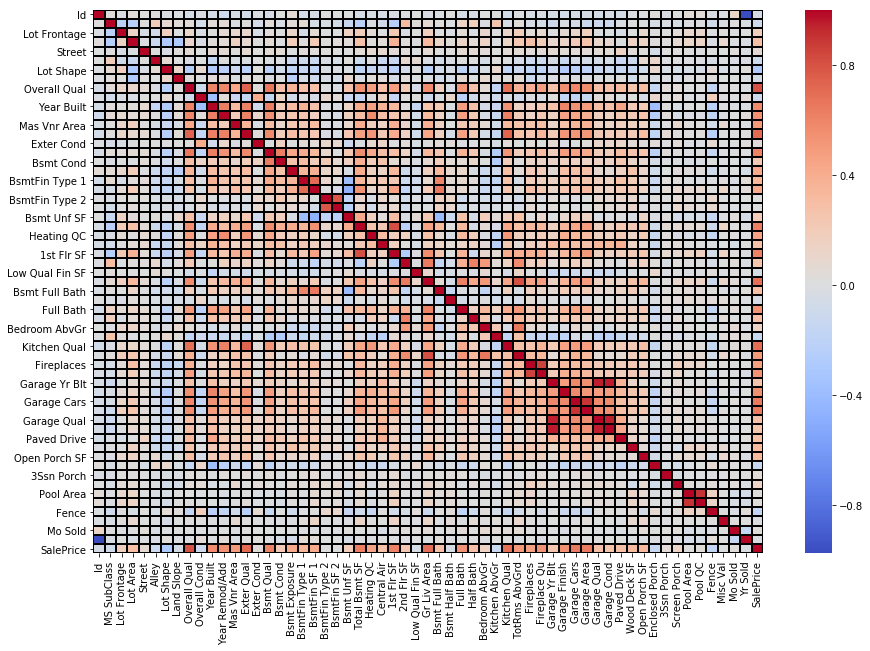

In [14]:
# Create a heatmap of all numerical columns
plt.figure(figsize =(15,10))
sns.heatmap(train_num.corr(), cmap='coolwarm', linecolor='black', linewidths=1);

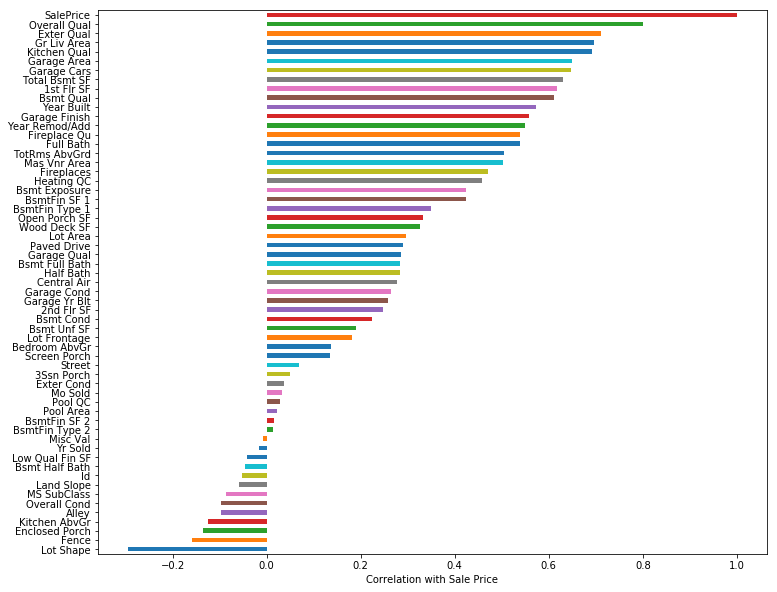

In [20]:
# Create a horizontal bar graph of correlation columns with Sale Price
plt.figure(figsize = (12,10))
train_num.corr()['SalePrice'].sort_values(ascending = True).plot("barh")
plt.xlabel("Correlation with Sale Price");

## Correlation with SalePrice

Here are the 15 features that show correlation more than 0.5 with the Sale Price

1. **Overall Qual**: Overall material and finish quality
2. **Exter Qual**: Exterior material quality
3. **Gr Liv Area**: Above grade (ground) living area square feet
4. **Kitchen Qual**: Kitchen quality
5. **Garage Area**: Size of garage in square feet
6. **Garage Cars**: Size of garage in car capacity
7. **Total Bsmt SF**: Total square feet of basement area
8. **1st Flr SF**: First Floor square feet
9. **Bsmt Qual**: Height of the basement
10. **Year Built**": Original construction date
11. **Year Remod/Add**: Remodel date (same as construction date if no remodeling or additions)
12. **Fireplace Qu**: Fireplace quality
13. **Full Bath**: Full bathrooms above grade
14. **TotRms AbvGrd**: Total rooms above grade (does not include bathrooms)
15. **Mas Vnr Area**: Masonry veneer area in square feet

In [21]:
features = ['Overall Qual', 'Exter Qual', 'Gr Liv Area', 'Kitchen Qual', 'Garage Area',
     'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Bsmt Qual', 'Year Built', 'Year Remod/Add'
    , 'Fireplace Qu', 'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area']

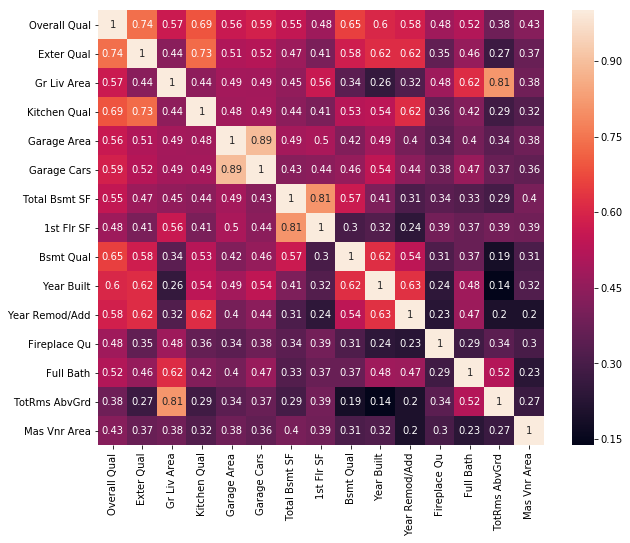

In [22]:
# calculate and plot the correlation bewtween the predictors/features
plt.figure(figsize = (10,8))
sns.heatmap(train_num[features].corr(), annot = True);

## Multicollinearity
multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. Therfore, it is necessary to check for multicollinearity in the features. 

In [25]:
# check for features with the correlation greater than 0.8
corr = train_num.corr()
indices = np.where(corr > 0.8)
[(corr.index[x], corr.columns[y]) for x, y in zip(*indices) if x != y and x < y]

[('Overall Qual', 'SalePrice'),
 ('Total Bsmt SF', '1st Flr SF'),
 ('Gr Liv Area', 'TotRms AbvGrd'),
 ('Fireplaces', 'Fireplace Qu'),
 ('Garage Yr Blt', 'Garage Qual'),
 ('Garage Yr Blt', 'Garage Cond'),
 ('Garage Cars', 'Garage Area'),
 ('Garage Qual', 'Garage Cond'),
 ('Pool Area', 'Pool QC')]

These are the features that are highly correlated with each other:
- **Total Bsmt SF and 1st Flr SF**
- **TotRms AbvGrd and Gr Liv Area**
- **Fireplace and Fireplace Qu**
- **Garage Yr Blt and Garage Qual**
- **Garage Yr Blt and Garage Cond**
- **Garage Area and Garage Cars**
- **Garage Qual and Garage Cond**
- **Pool Area and Pool QC**

In [ ]:
# In order to see more clear relationship between Total basement area and 1st floor area, 
# the house without basement should be removed
new = train_num[train_num['Total Bsmt SF'] != 0]
sns.jointplot(kind = 'scatter', data= new, x = 'Total Bsmt SF', y = '1st Flr SF');

## Avoiding Multicollinearity

In [ ]:
# Drop some of the multicollinearity columns
multicol_feature = ['Fireplace Qu', 'Garage Cond', 'Garage Cars', 'Pool QC', 'Garage Qual']
train = train.drop(multicol_feature, axis = 1)
test = test.drop(multicol_feature, axis = 1)
train_num.columns

In [ ]:
# export clean numerical and categorical columns
train.to_csv('../datasets/train_final.csv',index=False)
test.to_csv('../datasets/test_final.csv',index=False)